In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests 
import json
import isodate

In [7]:
df = pd.read_csv('MarquesBrownlee.csv')

In [12]:
df['publish_date']= pd.to_datetime(df['publish_date']) 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1116 entries, 0 to 1115
Data columns (total 16 columns):
Unnamed: 0               1116 non-null int64
comment_count            1116 non-null int64
dislike_count            1116 non-null int64
duration                 1116 non-null int64
like_count               1116 non-null int64
live                     1116 non-null int64
title                    1116 non-null object
view_count               1116 non-null int64
publish_hour             1116 non-null int64
publish_day              1116 non-null int64
publish_month            1116 non-null int64
publish_date             1116 non-null datetime64[ns]
days_after_last_video    1116 non-null int64
title_length             1116 non-null int64
description_length       1116 non-null int64
tag_count                1116 non-null int64
dtypes: datetime64[ns](1), int64(14), object(1)
memory usage: 139.6+ KB


In [19]:
df.set_index('publish_date', inplace = True)




In [20]:
tech_channel_monthly_views = df['2012-01-01':].view_count.resample('MS').median().astype('int')

In [27]:
tech_channel_monthly_views

publish_date
2012-01-01     123817
2012-02-01     243080
2012-03-01     278019
2012-04-01     305996
2012-05-01      84083
               ...   
2019-07-01    2917666
2019-08-01    4906598
2019-09-01    3911266
2019-10-01    2755991
2019-11-01    3101665
Freq: MS, Name: view_count, Length: 95, dtype: int64

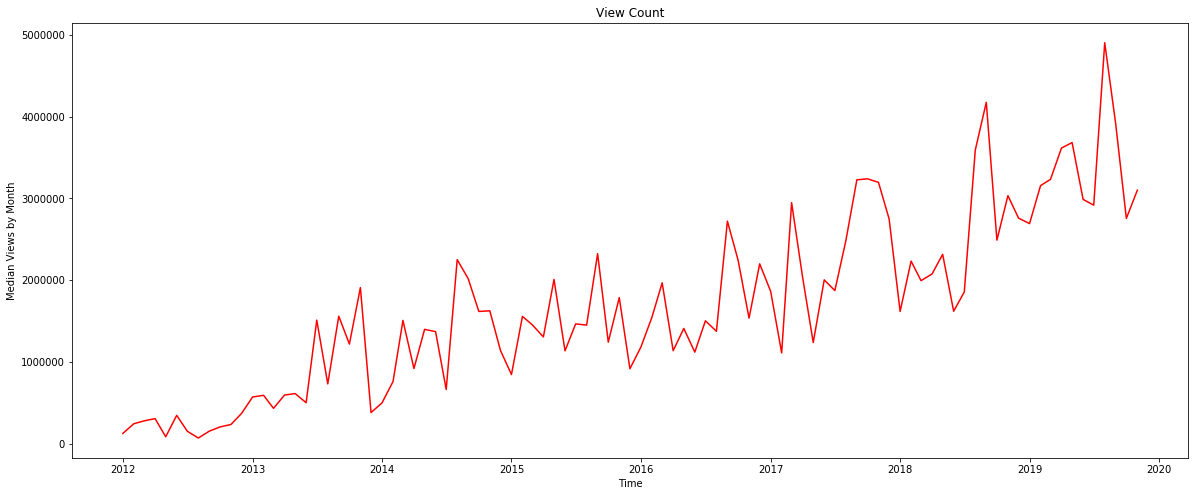

In [153]:
fig = plt.figure(figsize=(20,8))
plt.title('View Count')
plt.xlabel('Time')
plt.ylabel('Median Views by Month')
plt.plot(tech_channel_monthly_views, color = 'red');

In [32]:
pd.DataFrame(tech_channel_monthly_views).keys()

Index(['view_count'], dtype='object')

In [35]:
df2 = pd.DataFrame(tech_channel_monthly_views)

In [37]:
df2 = df2.reset_index()

In [40]:
df2

,publish_date,view_count
0,2012-01-01,123817
1,2012-02-01,243080
2,2012-03-01,278019
3,2012-04-01,305996
4,2012-05-01,84083
...,...,...
90,2019-07-01,2917666
91,2019-08-01,4906598
92,2019-09-01,3911266
93,2019-10-01,2755991


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1116 entries, 2008-05-30 to 2019-11-24
Data columns (total 15 columns):
Unnamed: 0               1116 non-null int64
comment_count            1116 non-null int64
dislike_count            1116 non-null int64
duration                 1116 non-null int64
like_count               1116 non-null int64
live                     1116 non-null int64
title                    1116 non-null object
view_count               1116 non-null int64
publish_hour             1116 non-null int64
publish_day              1116 non-null int64
publish_month            1116 non-null int64
days_after_last_video    1116 non-null int64
title_length             1116 non-null int64
description_length       1116 non-null int64
tag_count                1116 non-null int64
dtypes: int64(14), object(1)
memory usage: 179.5+ KB


In [164]:
 df['review'] = df.title.map(lambda x: 1 if ('Review' in x.split(' ')) | 
                            ('Review!' in x.split(' ')) | 
                            ('Review:' in x.split(' ')) |
                            ('Impressions' in x.split(' ')) | 
                            ('Impressions:' in x.split(' ')) |
                            ('Impressions!' in x.split(' ')) | 
                            ('Unboxing' in x.split(' ')) | 
                            ('Unboxing:' in x.split(' ')) |
                            ('Unboxing!' in x.split(' ')) 
                            else 0)
        
df['Apple'] = df.title.map(lambda x: 1 if ('Apple' in x.split(' ')) | 
                            ('Apple!' in x.split(' ')) | 
                            ('iPhone' in x.split(' ')) |
                            ('iPhone!' in x.split(' ')) | 
                            ('iPad!:' in x.split(' ')) |
                            ('iPad' in x.split(' ')) | 
                            ('iMac' in x.split(' ')) | 
                            ('Mac' in x.split(' ')) |
                            ('Macbook' in x.split(' ')) |
                            ('Macbook:' in x.split(' ')) |
                            ('AirPods' in x.split(' ')) |
                            ('Airpods!' in x.split(' ')) 
                            else 0)
        
df['Google'] = df.title.map(lambda x: 1 if ('Google' in x.split(' ')) else 0)
        
df['Samsung'] = df.title.map(lambda x: 1 if ('Samsung' in x.split(' ')) | 
                            ('Samsung!' in x.split(' ')) | 
                            ('Galaxy' in x.split(' ')) |
                            ('Note' in x.split(' '))  
                            else 0)
        
df['Tesla'] = df.title.map(lambda x: 1 if ('Tesla' in x.split(' ')) else 0)
        
df['OnePlus'] = df.title.map(lambda x: 1 if ('OnePlus' in x.split(' ')) else 0)

df['LG'] = df.title.map(lambda x: 1 if ('LG' in x.split(' ')) else 0)
        
    
        

In [165]:
sum(df.title.map(lambda x: 1 if ('Xiaomi' in x.split(' ')) else 0 ))

3

In [166]:
plotting_df = df[['Apple', 'Google', 'Samsung', 'Tesla', 'OnePlus', 'LG']].sum()
plotting_df.sort_values()

Tesla       22
LG          27
OnePlus     28
Google      75
Samsung     87
Apple      116
dtype: int64

Text(0.5, 1.0, 'Number of videos by brand')

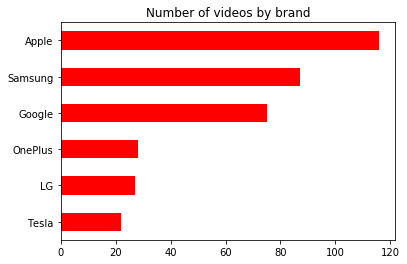

In [167]:
ax = plotting_df.sort_values().plot.barh(plotting_df, color = 'red')
plt.title('Number of videos by brand')